<a href="https://colab.research.google.com/github/anegorochka/camokat/blob/main/%D0%BA%D0%B5%D0%B9%D1%81_%D1%81%D0%B0%D0%BC%D0%BE%D0%BA%D0%B0%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
warehouses = pd.read_csv('/content/drive/MyDrive/Самокат Аналитик Данных-20250325T195519Z-001/Самокат Аналитик Данных/warehouses.csv')
warehouses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          74 non-null     object
 1   warehouse_id  74 non-null     int64 
 2   address       74 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.9+ KB


In [ ]:
warehouses.head()

,city,warehouse_id,address
0,Москва,1,"Центральная, ул. 28"
1,Санкт-Петербург,2,"Молодежная, ул. 14"
2,Москва,8,"Школьная, ул. 21"
3,Москва,10,"Лесная, ул. 27"
4,Санкт-Петербург,12,"Советская, ул. 20"


In [ ]:
import chardet

with open('/content/drive/MyDrive/Самокат Аналитик Данных-20250325T195519Z-001/Самокат Аналитик Данных/products.csv', 'rb') as f:
    result = chardet.detect(f.read())

products = pd.read_csv('/content/drive/MyDrive/Самокат Аналитик Данных-20250325T195519Z-001/Самокат Аналитик Данных/products.csv', encoding=result['encoding'])

In [ ]:
products.head()

,product_id,product,category
0,8,"Мороженое Коровка из Кореновки пломбир, ваниль...",Замороженная продукция
1,9,"Мороженое Коровка из Кореновки пломбир, шокола...",Замороженная продукция
2,12,"Мороженое Коровка из Кореновки пломбир, крем-б...",Замороженная продукция
3,16,"Мороженое Коровка из Кореновки пломбир, шокола...",Замороженная продукция
4,22,"Мороженое Коровка из Кореновки пломбир, двухсл...",Замороженная продукция


In [ ]:
orders = pd.read_csv('/content/drive/MyDrive/Самокат Аналитик Данных-20250325T195519Z-001/Самокат Аналитик Данных/orders.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269271 entries, 0 to 269270
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   order_date    269271 non-null  object
 1   order_id      269271 non-null  int64 
 2   warehouse_id  269271 non-null  int64 
 3   user_id       269271 non-null  object
dtypes: int64(2), object(2)
memory usage: 8.2+ MB


<ipython-input-6-d574b20b2864>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  orders = pd.read_csv('/content/drive/MyDrive/Самокат Аналитик Данных-20250325T195519Z-001/Самокат Аналитик Данных/orders.csv')


In [ ]:
orders.head()

,order_date,order_id,warehouse_id,user_id
0,2017-08-01,910381,38,11473
1,2017-08-01,918510,276,52410
2,2017-08-01,909015,208,10155
3,2017-08-01,915064,2,60635
4,2017-08-01,914110,38,17185


In [ ]:
order_lines = pd.read_csv('/content/drive/MyDrive/Самокат Аналитик Данных-20250325T195519Z-001/Самокат Аналитик Данных/order_lines.txt', sep='\s+')
order_lines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975171 entries, 0 to 975170
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   order_id    975171 non-null  int64 
 1   product_id  975171 non-null  object
 2   price       975171 non-null  object
 3   quantity    975171 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 29.8+ MB


<ipython-input-7-22b65799ec1e>:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  order_lines = pd.read_csv('/content/drive/MyDrive/Самокат Аналитик Данных-20250325T195519Z-001/Самокат Аналитик Данных/order_lines.txt', sep='\s+')


In [ ]:
order_lines.head()

,order_id,product_id,price,quantity
0,47772,1929,110.25,1
1,47772,3785,16.5,1
2,47772,3967,39.0,1
3,47772,5837,36.75,1
4,56496,2591,171.75,1


Узнать ТОП-10 самых продаваемых продуктов



In [ ]:
# топ-10 самых продаваемых продуктов (id продукта, его название и сколько всего продано)
top_10_products_without_names = order_lines.groupby('product_id').agg({"quantity": "sum"})
top_10_products = products[['product_id','product']].merge(top_10_products_without_names,
                                                           left_on='product_id',
                                                           right_on='product_id',
                                                           how='inner')\
                                                    .sort_values(by="quantity", ascending=False).head(10)
top_10_products

,product_id,product,quantity
223,1227,"Туалетная бумага Zewa deluxe, 3 слоя, белая, с...",10527
608,3107,"Корм Kitekat для кошек, с кроликом в соусе, 85 г",10039
750,3950,"Икра трески Санта Бремор Pate, деликатесная, 90 г",7578
319,1687,"Крабовые палочки Бухта Изобилия имитация, замо...",6553
1041,5825,"Овощная смесь Vитамин гавайская, 400 г",6124
169,928,"Корм Cesar для собак, паучи из тушеной телятин...",5830
560,2870,"Йогурт Чудо питьевой, с вишней и черешней, 2,4...",5469
895,4861,"Соль Зимушка краса поваренная, выварочная, экс...",5432
195,1092,"Сырок Простоквашино глазированный, со сгущённы...",5093
289,1508,"Шоколад Toblerone молочный, с медово-миндально...",4939


Вывод: самым продаваемым стала Туалетная бумага Zewa deluxe, 3 слоя, белая, с..., её купили больше 10000 раз, что больше чем в два раза превышает количество продаж товара, который находится на 10 месте в топе (Шоколад Toblerone молочный, с медово-миндально.. — 4939 штук)






Гипотеза: количество продаж увеличивается по выходным дням.

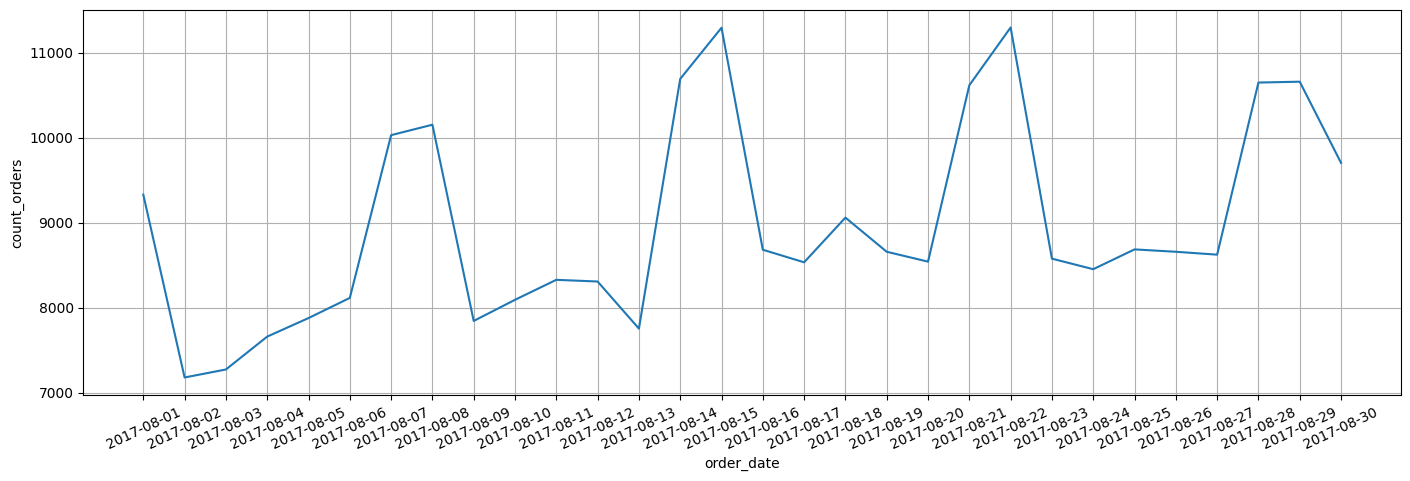

In [ ]:
# сколько в день
orders_per_date = orders.groupby('order_date').agg({"order_id": "count"})
orders_per_date.rename(columns={'order_id': 'count_orders'}, inplace=True)

plt.figure(figsize=(17, 5))
sns.lineplot(x="order_date", y="count_orders", data=orders_per_date)
plt.xticks(rotation = 25)
plt.grid(True)
plt.show()

Вывод: Мы видим тенденцию роста количества заказов по выходным

Узнаем сколько уникальных адресов доставки в каждом городе.

In [ ]:
# сколько в каждом городе заказали за месяц
count_city = warehouses.groupby('city').agg({"warehouse_id": "count"}).reset_index()
count_city.rename(columns={'city': 'city','warehouse_id': 'count_users'}, inplace=True)
count_city

,city,count_users
0,Москва,40
1,Санкт-Петербург,34


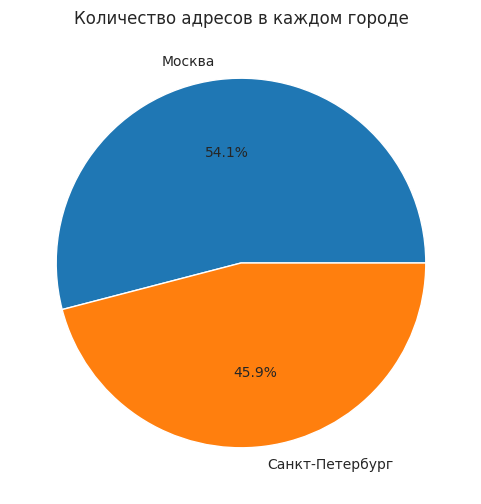

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(count_city['count_users'], labels=count_city['city'], autopct='%1.1f%%')
plt.title('Количество адресов в каждом городе')
plt.show()

In [ ]:
# топ 10 пользователей по количеству заказов
users = orders.groupby('user_id').agg({"order_id":"count"}).sort_values(by="order_id", ascending=False).head(10)
users.rename(columns={'order_id': 'count_orders'}, inplace=True)
users

,count_orders
user_id,
197929,42
1498904,40
24242,37
1491889,37
77336,36
1182688,34
17614,34
52352,33
154455,33


Выгрузить список user_id тех пользователей,
кто купил за период 1-15 августа 2 любых корма для животных, кроме "Корм Kitekat для кошек, с кроликом в соусе, 85 г".

In [ ]:
# отбор по датам с 1 августа по 15 августа
date_half_part_august = orders[(orders['order_date'] >= '2017-08-01') & (orders['order_date'] <= '2017-08-15')]

not_that_product = products.loc[products['product'] == 'Корм Kitekat для кошек, с кроликом в соусе, 85 г', 'product_id']

In [ ]:
all_korm = products[products['product'].str.contains('Корм')]
all_korm = all_korm['product_id']
all_korms = all_korm.to_numpy()



гипотеза - вывод